In [11]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import codecs
import csv
from zipfile import ZipFile

import io

# matplotlib
from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# scipy specifics
from scipy import stats as sps
from scipy.interpolate import interp1d

In [40]:
import pandas as pd
import zipfile
from urllib.request import urlopen
import io

req = Request('https://cloud.minsa.gob.pe/s/NctBnHXDnocgWAg/download')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')

# open and save the zip file onto computer
#url = urlopen(req)

file =zipfile.ZipFile((io.BytesIO(urlopen(req).read())))
file_name = file.namelist()[1]
#file_name
xls = pd.read_excel(file.open(file_name).read(), engine='openpyxl', index_col=0)  # <-- add .read()
xls

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,PROVINCIA DOMICILIO,...,DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X),DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X)
Nº,,,,,,,,,,,,,,,,,,,,,
1,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,MARISCAL CACERES,...,NEUMONIA SEVERA,J159,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809,SIN REGISTRO,SIN REGISTRO
2,SIS,FEMENINO,15,MINUTOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-12-08-06-000,PERU,LA LIBERTAD,ASCOPE,...,DIFICULTAD RESPIRATORIA DEL RECIEN NACIDO,P229,INMATURIDAD EXTREMA,P072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
3,IGNORADO,MASCULINO,59,AÑOS,SOLTERO,IGNORADO,92-33-24-01-01-000,PERU,CALLAO,CALLAO,...,SHOCK HIPOVOLEMICO,SIN REGISTRO,SUCESO DE TRANSITO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
4,SIS,FEMENINO,86,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-21-03-13-000,PERU,SAN MARTIN,LAMAS,...,HIPERLIPIDEMIA NO ESPECIFICADA,E785,ATEROSCLEROSIS GENERALIZADA Y LA NO ESPECIFICADA,I709,HIPERTENSION ESENCIAL,I10X,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
5,SIS,MASCULINO,51,AÑOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-14-10-01-106,PERU,LIMA,OYON,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692543,SIS,MASCULINO,77,AÑOS,CASADO,NINGUN NIVEL / ILETRADO,92-33-05-07-02-101,PERU,AYACUCHO,VICTOR FAJARDO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
692544,SIS,FEMENINO,86,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-04-03-101,PERU,AYACUCHO,LA MAR,...,ESTADO ASMATICO. ASMA AGUDA SEVERA.,J46X,ASMA NO ESPECIFICADO. ASMA DE APARICION TARDIA...,J459,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
692545,SIS,MASCULINO,63,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-02-10-03-102,PERU,ANCASH,PALLASCA,...,CAIDA POR DESLIZAMIENTO EN CALLES,W014,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO


In [3]:
xls

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,PROVINCIA DOMICILIO,...,DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X),DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X)
Nº,,,,,,,,,,,,,,,,,,,,,
1,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,MARISCAL CACERES,...,NEUMONIA SEVERA,J159,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809,SIN REGISTRO,SIN REGISTRO
2,SIS,FEMENINO,15,MINUTOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-12-08-06-000,PERU,LA LIBERTAD,ASCOPE,...,DIFICULTAD RESPIRATORIA DEL RECIEN NACIDO,P229,INMATURIDAD EXTREMA,P072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
3,IGNORADO,MASCULINO,59,AÑOS,SOLTERO,IGNORADO,92-33-24-01-01-000,PERU,CALLAO,CALLAO,...,SHOCK HIPOVOLEMICO,SIN REGISTRO,SUCESO DE TRANSITO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
4,SIS,FEMENINO,86,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-21-03-13-000,PERU,SAN MARTIN,LAMAS,...,HIPERLIPIDEMIA NO ESPECIFICADA,E785,ATEROSCLEROSIS GENERALIZADA Y LA NO ESPECIFICADA,I709,HIPERTENSION ESENCIAL,I10X,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
5,IGNORADO,MASCULINO,38,AÑOS,IGNORADO,IGNORADO,93-32-00-00-00-000,FILIPINAS,EXTRANJERO,EXTRANJERO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682585,SIS,MASCULINO,77,AÑOS,CASADO,NINGUN NIVEL / ILETRADO,92-33-05-07-02-101,PERU,AYACUCHO,VICTOR FAJARDO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
682586,SIS,FEMENINO,86,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-04-03-101,PERU,AYACUCHO,LA MAR,...,ESTADO ASMATICO. ASMA AGUDA SEVERA.,J46X,ASMA NO ESPECIFICADO. ASMA DE APARICION TARDIA...,J459,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
682587,SIS,MASCULINO,63,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-02-10-03-102,PERU,ANCASH,PALLASCA,...,CAIDA POR DESLIZAMIENTO EN CALLES,W014,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO


In [41]:
for col in xls.columns: 
    print(col) 

TIPO SEGURO
SEXO
EDAD
TIEMPO EDAD
ESTADO CIVIL
NIVEL DE INSTRUCCIÓN
COD# UBIGEO DOMICILIO
PAIS DOMICILIO
DEPARTAMENTO DOMICILIO
PROVINCIA DOMICILIO
DISTRITO DOMICILIO
FECHA
AÑO
MES
TIPO LUGAR
INSTITUCION
MUERTE VIOLENTA
NECROPSIA
DEBIDO A (CAUSA A)
CAUSA A (CIE-X)
DEBIDO A (CAUSA B)
CAUSA B (CIE-X)
DEBIDO A (CAUSA C)
CAUSA C (CIE-X)
DEBIDO A (CAUSA D)
CAUSA D (CIE-X)
DEBIDO A (CAUSA E)
CAUSA E (CIE-X)
DEBIDO A (CAUSA F)
CAUSA F (CIE-X)


In [42]:
xls.isnull().sum()

TIPO SEGURO               0
SEXO                      0
EDAD                      0
TIEMPO EDAD               0
ESTADO CIVIL              0
NIVEL DE INSTRUCCIÓN      0
COD# UBIGEO DOMICILIO     0
PAIS DOMICILIO            0
DEPARTAMENTO DOMICILIO    0
PROVINCIA DOMICILIO       0
DISTRITO DOMICILIO        0
FECHA                     0
AÑO                       0
MES                       0
TIPO LUGAR                0
INSTITUCION               0
MUERTE VIOLENTA           0
NECROPSIA                 0
DEBIDO A (CAUSA A)        0
CAUSA A (CIE-X)           0
DEBIDO A (CAUSA B)        0
CAUSA B (CIE-X)           0
DEBIDO A (CAUSA C)        0
CAUSA C (CIE-X)           0
DEBIDO A (CAUSA D)        0
CAUSA D (CIE-X)           0
DEBIDO A (CAUSA E)        0
CAUSA E (CIE-X)           0
DEBIDO A (CAUSA F)        0
CAUSA F (CIE-X)           0
dtype: int64

In [43]:
xls.drop(['DEBIDO A (CAUSA A)','CAUSA A (CIE-X)', 'DEBIDO A (CAUSA B)', 'CAUSA B (CIE-X)', 'DEBIDO A (CAUSA C)', 'CAUSA C (CIE-X)', 'DEBIDO A (CAUSA D)', 'CAUSA D (CIE-X)', 'DEBIDO A (CAUSA E)', 'CAUSA E (CIE-X)', 'DEBIDO A (CAUSA F)','CAUSA F (CIE-X)'], axis=1, inplace=True)

In [44]:
xls

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,PROVINCIA DOMICILIO,DISTRITO DOMICILIO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA
Nº,,,,,,,,,,,,,,,,,,
1,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,MARISCAL CACERES,JUANJUI,2020-01-17,2020,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
2,SIS,FEMENINO,15,MINUTOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-12-08-06-000,PERU,LA LIBERTAD,ASCOPE,PAIJAN,2021-01-19,2021,1,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
3,IGNORADO,MASCULINO,59,AÑOS,SOLTERO,IGNORADO,92-33-24-01-01-000,PERU,CALLAO,CALLAO,CALLAO,2021-01-30,2021,1,VIA PUBLICA,SIN REGISTRO,NO SE CONOCE,SI SE REALIZÓ NECROPSIA
4,SIS,FEMENINO,86,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-21-03-13-000,PERU,SAN MARTIN,LAMAS,TABALOSOS,2020-01-03,2020,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
5,SIS,MASCULINO,51,AÑOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-14-10-01-106,PERU,LIMA,OYON,OYON,2021-01-10,2021,1,VIA PUBLICA,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692543,SIS,MASCULINO,77,AÑOS,CASADO,NINGUN NIVEL / ILETRADO,92-33-05-07-02-101,PERU,AYACUCHO,VICTOR FAJARDO,ALCAMENCA,2020-12-07,2020,12,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
692544,SIS,FEMENINO,86,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-04-03-101,PERU,AYACUCHO,LA MAR,AYNA,2020-12-17,2020,12,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
692545,SIS,MASCULINO,63,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-02-10-03-102,PERU,ANCASH,PALLASCA,CONCHUCOS,2020-12-22,2020,12,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA


In [45]:
xls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692547 entries, 1 to 692547
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   TIPO SEGURO             692547 non-null  object        
 1   SEXO                    692547 non-null  object        
 2   EDAD                    692547 non-null  object        
 3   TIEMPO EDAD             692547 non-null  object        
 4   ESTADO CIVIL            692547 non-null  object        
 5   NIVEL DE INSTRUCCIÓN    692547 non-null  object        
 6   COD# UBIGEO DOMICILIO   692547 non-null  object        
 7   PAIS DOMICILIO          692547 non-null  object        
 8   DEPARTAMENTO DOMICILIO  692547 non-null  object        
 9   PROVINCIA DOMICILIO     692547 non-null  object        
 10  DISTRITO DOMICILIO      692547 non-null  object        
 11  FECHA                   692547 non-null  datetime64[ns]
 12  AÑO                     692547

In [46]:
xls.describe()

,AÑO,MES
count,692547.000000,692547.000000
mean,2019.301236,5.907024
std,1.355441,3.257479
min,2017.000000,1.000000
25%,2018.000000,3.000000
50%,2020.000000,5.000000
75%,2020.000000,8.000000
max,2021.000000,12.000000


In [47]:
#pd.xls.replace('SIN REGISTRO', np.nan)
xls = xls.rename(columns={"COD# UBIGEO DOMICILIO": "UBIGEO","PAIS DOMICILIO": "PAIS","DEPARTAMENTO DOMICILIO": "DEPARTAMENTO", "PROVINCIA DOMICILIO": "PROVINCIA", "DISTRITO DOMICILIO": "DISTRITO"})


In [48]:
xls

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,UBIGEO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA
Nº,,,,,,,,,,,,,,,,,,
1,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,MARISCAL CACERES,JUANJUI,2020-01-17,2020,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
2,SIS,FEMENINO,15,MINUTOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-12-08-06-000,PERU,LA LIBERTAD,ASCOPE,PAIJAN,2021-01-19,2021,1,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
3,IGNORADO,MASCULINO,59,AÑOS,SOLTERO,IGNORADO,92-33-24-01-01-000,PERU,CALLAO,CALLAO,CALLAO,2021-01-30,2021,1,VIA PUBLICA,SIN REGISTRO,NO SE CONOCE,SI SE REALIZÓ NECROPSIA
4,SIS,FEMENINO,86,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-21-03-13-000,PERU,SAN MARTIN,LAMAS,TABALOSOS,2020-01-03,2020,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
5,SIS,MASCULINO,51,AÑOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-14-10-01-106,PERU,LIMA,OYON,OYON,2021-01-10,2021,1,VIA PUBLICA,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692543,SIS,MASCULINO,77,AÑOS,CASADO,NINGUN NIVEL / ILETRADO,92-33-05-07-02-101,PERU,AYACUCHO,VICTOR FAJARDO,ALCAMENCA,2020-12-07,2020,12,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
692544,SIS,FEMENINO,86,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-04-03-101,PERU,AYACUCHO,LA MAR,AYNA,2020-12-17,2020,12,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
692545,SIS,MASCULINO,63,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-02-10-03-102,PERU,ANCASH,PALLASCA,CONCHUCOS,2020-12-22,2020,12,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA


In [49]:
xls = xls.sort_values(by = 'FECHA')
xls['FECHA'] = pd.to_datetime(xls['FECHA'], errors='coerce', dayfirst=True)
xls['FECHA'] = pd.to_datetime(xls['FECHA'], format='%y-%m-%d', errors='ignore')
xls

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,UBIGEO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA
Nº,,,,,,,,,,,,,,,,,,
523367,PRIVADOS,FEMENINO,66,AÑOS,CASADO,PRIMARIA COMPLETA,92-33-15-01-13-000,PERU,LORETO,MAYNAS,SAN JUAN BAUTISTA,2017-01-01,2017,1,EESS,PRIVADO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
462278,IGNORADO,INDETERMINADO,90,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-14-01-06-000,PERU,LIMA,LIMA,COMAS,2017-01-01,2017,1,EN TRANSITO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
464610,SIS,FEMENINO,83,AÑOS,CONVIVIENT/CONCUBINA,NINGUN NIVEL / ILETRADO,92-33-06-06-15-000,PERU,CAJAMARCA,CHOTA,TACABAMBA,2017-01-01,2017,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,SIN REGISTRO
462284,IGNORADO,MASCULINO,75,AÑOS,CASADO,SECUNDARIA COMPLETA,92-33-14-01-06-000,PERU,LIMA,LIMA,COMAS,2017-01-01,2017,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
458880,IGNORADO,FEMENINO,55,AÑOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-13-01-12-000,PERU,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ,2017-01-01,2017,1,EESS,ESSALUD,SIN REGISTRO,SIN REGISTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297644,SIS,FEMENINO,66,AÑOS,CASADO,SECUNDARIA COMPLETA,92-33-11-09-01-000,PERU,JUNIN,CHUPACA,CHUPACA,2021-06-08,2021,6,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
297643,ESSALUD,FEMENINO,39,AÑOS,SOLTERO,IGNORADO,92-33-14-01-26-000,PERU,LIMA,LIMA,SAN MARTIN DE PORRES,2021-06-08,2021,6,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
297641,IGNORADO,MASCULINO,78,AÑOS,SOLTERO,SECUNDARIA COMPLETA,92-33-11-01-01-000,PERU,JUNIN,HUANCAYO,HUANCAYO,2021-06-08,2021,6,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA


In [50]:
xls['FECHA'].replace('SIN REGISTRO', np.nan)
xls['EDAD'].replace('SIN REGISTRO', np.nan)
xls['FECHA'].dropna()
xls['EDAD'].dropna()

Nº
523367    66
462278    90
464610    83
462284    75
458880    55
          ..
297644    66
297643    39
297641    78
297636    35
297790    94
Name: EDAD, Length: 692547, dtype: object

In [51]:
xls

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,UBIGEO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA
Nº,,,,,,,,,,,,,,,,,,
523367,PRIVADOS,FEMENINO,66,AÑOS,CASADO,PRIMARIA COMPLETA,92-33-15-01-13-000,PERU,LORETO,MAYNAS,SAN JUAN BAUTISTA,2017-01-01,2017,1,EESS,PRIVADO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
462278,IGNORADO,INDETERMINADO,90,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-14-01-06-000,PERU,LIMA,LIMA,COMAS,2017-01-01,2017,1,EN TRANSITO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
464610,SIS,FEMENINO,83,AÑOS,CONVIVIENT/CONCUBINA,NINGUN NIVEL / ILETRADO,92-33-06-06-15-000,PERU,CAJAMARCA,CHOTA,TACABAMBA,2017-01-01,2017,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,SIN REGISTRO
462284,IGNORADO,MASCULINO,75,AÑOS,CASADO,SECUNDARIA COMPLETA,92-33-14-01-06-000,PERU,LIMA,LIMA,COMAS,2017-01-01,2017,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
458880,IGNORADO,FEMENINO,55,AÑOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-13-01-12-000,PERU,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ,2017-01-01,2017,1,EESS,ESSALUD,SIN REGISTRO,SIN REGISTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297644,SIS,FEMENINO,66,AÑOS,CASADO,SECUNDARIA COMPLETA,92-33-11-09-01-000,PERU,JUNIN,CHUPACA,CHUPACA,2021-06-08,2021,6,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
297643,ESSALUD,FEMENINO,39,AÑOS,SOLTERO,IGNORADO,92-33-14-01-26-000,PERU,LIMA,LIMA,SAN MARTIN DE PORRES,2021-06-08,2021,6,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
297641,IGNORADO,MASCULINO,78,AÑOS,SOLTERO,SECUNDARIA COMPLETA,92-33-11-01-01-000,PERU,JUNIN,HUANCAYO,HUANCAYO,2021-06-08,2021,6,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA


In [56]:
start_date = "2019-01-01"

after_start_date = xls["FECHA"] >= start_date
filtered_dates = xls.loc[after_start_date]

xls_edad_anos = filtered_dates[filtered_dates['TIEMPO EDAD']=='AÑOS']
xls_edad_anos

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,UBIGEO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA
Nº,,,,,,,,,,,,,,,,,,
652896,IGNORADO,MASCULINO,76,AÑOS,SOLTERO,SECUNDARIA COMPLETA,92-33-24-01-06-000,PERU,CALLAO,CALLAO,VENTANILLA,2019-01-01,2019,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
563009,IGNORADO,FEMENINO,65,AÑOS,CASADO,SECUNDARIA INCOMPLETA,92-33-14-01-35-000,PERU,LIMA,LIMA,EL AGUSTINO,2019-01-01,2019,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,SI SE REALIZÓ NECROPSIA
562869,SIS,FEMENINO,48,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-06-05-02-000,PERU,CAJAMARCA,CUTERVO,CALLAYUC,2019-01-01,2019,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
564881,ESSALUD,MASCULINO,54,AÑOS,DIVORCIADO,SECUNDARIA COMPLETA,92-33-14-01-36-000,PERU,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2019-01-01,2019,1,EESS,ESSALUD,SIN REGISTRO,SI SE REALIZÓ NECROPSIA
564877,SANIDAD FAP,MASCULINO,89,AÑOS,CASADO,SUPERIOR NO UNIV. COMP.,92-33-04-01-07-000,PERU,AREQUIPA,AREQUIPA,MIRAFLORES,2019-01-01,2019,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297644,SIS,FEMENINO,66,AÑOS,CASADO,SECUNDARIA COMPLETA,92-33-11-09-01-000,PERU,JUNIN,CHUPACA,CHUPACA,2021-06-08,2021,6,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
297643,ESSALUD,FEMENINO,39,AÑOS,SOLTERO,IGNORADO,92-33-14-01-26-000,PERU,LIMA,LIMA,SAN MARTIN DE PORRES,2021-06-08,2021,6,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
297641,IGNORADO,MASCULINO,78,AÑOS,SOLTERO,SECUNDARIA COMPLETA,92-33-11-01-01-000,PERU,JUNIN,HUANCAYO,HUANCAYO,2021-06-08,2021,6,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA


In [57]:
xls_edad_anos.EDAD = pd.to_numeric(xls_edad_anos.EDAD, errors='coerce')
xls_edad_anos
#xls_edad_anos['EDAD'].astype(str).astype(int)
#xls_edad_anos['EDAD']

/home/geny/.local/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,UBIGEO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA
Nº,,,,,,,,,,,,,,,,,,
652896,IGNORADO,MASCULINO,76,AÑOS,SOLTERO,SECUNDARIA COMPLETA,92-33-24-01-06-000,PERU,CALLAO,CALLAO,VENTANILLA,2019-01-01,2019,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
563009,IGNORADO,FEMENINO,65,AÑOS,CASADO,SECUNDARIA INCOMPLETA,92-33-14-01-35-000,PERU,LIMA,LIMA,EL AGUSTINO,2019-01-01,2019,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,SI SE REALIZÓ NECROPSIA
562869,SIS,FEMENINO,48,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-06-05-02-000,PERU,CAJAMARCA,CUTERVO,CALLAYUC,2019-01-01,2019,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
564881,ESSALUD,MASCULINO,54,AÑOS,DIVORCIADO,SECUNDARIA COMPLETA,92-33-14-01-36-000,PERU,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2019-01-01,2019,1,EESS,ESSALUD,SIN REGISTRO,SI SE REALIZÓ NECROPSIA
564877,SANIDAD FAP,MASCULINO,89,AÑOS,CASADO,SUPERIOR NO UNIV. COMP.,92-33-04-01-07-000,PERU,AREQUIPA,AREQUIPA,MIRAFLORES,2019-01-01,2019,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297644,SIS,FEMENINO,66,AÑOS,CASADO,SECUNDARIA COMPLETA,92-33-11-09-01-000,PERU,JUNIN,CHUPACA,CHUPACA,2021-06-08,2021,6,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
297643,ESSALUD,FEMENINO,39,AÑOS,SOLTERO,IGNORADO,92-33-14-01-26-000,PERU,LIMA,LIMA,SAN MARTIN DE PORRES,2021-06-08,2021,6,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
297641,IGNORADO,MASCULINO,78,AÑOS,SOLTERO,SECUNDARIA COMPLETA,92-33-11-01-01-000,PERU,JUNIN,HUANCAYO,HUANCAYO,2021-06-08,2021,6,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA


In [64]:
#bins = [17, 59, 69, 79, 130]

#rs = pd.cut(xls_edad_anos['EDAD'], bins)
#rs

df_total = xls_edad_anos.groupby(['FECHA', 'AÑO']).size().unstack()
df_total = df_total.rename(columns=str).reset_index()
# df.drop(columns=df.columns[0], 
#         axis=1, 
#         inplace=True)
df_total

AÑO,FECHA,2019,2020,2021
0,2019-01-01,329.0,NaN,NaN
1,2019-01-02,306.0,NaN,NaN
2,2019-01-03,314.0,NaN,NaN
3,2019-01-04,290.0,NaN,NaN
4,2019-01-05,303.0,NaN,NaN
...,...,...,...,...
885,2021-06-04,NaN,NaN,657.0
886,2021-06-05,NaN,NaN,682.0
887,2021-06-06,NaN,NaN,638.0
888,2021-06-07,NaN,NaN,627.0


In [65]:
df_total.to_csv('fallecidos_total.csv' , index=False)

In [69]:
bins = [17, 59, 69, 79, 130]

rs = pd.cut(xls_edad_anos['EDAD'], bins)
#rs

df = xls_edad_anos.groupby(['FECHA', rs]).size().unstack()
df = df.rename(columns=str).reset_index()
# df.drop(columns=df.columns[0], 
#         axis=1, 
#         inplace=True)
df = df.rename(columns={'(17, 59]': '18-59', '(59, 69]': '60-69', '(69, 79]': '70-79', '(79, 130]' : '80+'})
df

EDAD,FECHA,18-59,60-69,70-79,80+
0,2019-01-01,96,42,62,117
1,2019-01-02,85,44,64,103
2,2019-01-03,83,35,62,123
3,2019-01-04,69,36,66,110
4,2019-01-05,77,46,58,118
...,...,...,...,...,...
885,2021-06-04,182,157,128,185
886,2021-06-05,189,142,153,187
887,2021-06-06,174,138,141,180
888,2021-06-07,183,145,126,164


In [70]:
df.to_csv('fallecidos_edad.csv' , index=False)

In [38]:
bins = [0, 18, 59, 69, 80, 130]

rs = pd.cut(xls_edad_anos['EDAD'], bins)
#rs

df_anos = xls_edad_anos.groupby(['FECHA',rs]).size().unstack()
df_anos = df_anos.rename(columns=str).reset_index()
df_anos

EDAD,FECHA,"(0, 17]","(17, 30]","(30, 40]","(40, 60]","(60, 80]","(80, 100]","(100, 130]"
0,2017-01-01,9,24,15,48,88,72,2
1,2017-01-02,8,8,14,44,74,84,0
2,2017-01-03,6,4,13,28,77,79,0
3,2017-01-04,7,9,13,37,65,88,1
4,2017-01-05,6,6,4,47,73,62,0
...,...,...,...,...,...,...,...,...
1596,2021-05-16,6,20,35,208,409,225,1
1597,2021-05-17,12,15,37,209,378,222,1
1598,2021-05-18,8,17,39,197,369,202,1
1599,2021-05-19,12,20,35,207,392,179,3


In [20]:
muertesxsemanas = xls_edad_anos.sort_values(by = 'FECHA')
start_date = "2017-01-01"
end_date = "2020-10-03"

after_start_date = muertesxsemanas["FECHA"] >= start_date
before_end_date = muertesxsemanas["FECHA"] <= end_date
between_two_dates = after_start_date & before_end_date
xls_filt = xls_edad_anos.loc[between_two_dates]
xls_filt

,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,UBIGEO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA
Nº,,,,,,,,,,,,,,,,,,
453480,ESSALUD,FEMENINO,85.0,AÑOS,VIUDO,NINGUN NIVEL / ILETRADO,92-33-14-01-42-000,PERU,LIMA,LIMA,LOS OLIVOS,2019-11-01,2019,11,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
453451,SIS,MASCULINO,58.0,AÑOS,SOLTERO,SECUNDARIA COMPLETA,92-33-14-01-08-000,PERU,LIMA,LIMA,CHORRILLOS,2019-11-01,2019,11,EESS,MINSA,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
453493,ESSALUD,MASCULINO,81.0,AÑOS,CASADO,SUPERIOR UNIV. COMP.,92-33-14-01-01-101,PERU,LIMA,LIMA,LIMA,2019-11-01,2019,11,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
494390,SIS,MASCULINO,76.0,AÑOS,CASADO,PRIMARIA INCOMPLETA,92-33-06-11-01-000,PERU,CAJAMARCA,SAN IGNACIO,SAN IGNACIO,2019-11-01,2019,11,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
453479,ESSALUD,FEMENINO,68.0,AÑOS,SOLTERO,IGNORADO,92-33-02-13-01-000,PERU,ANCASH,SANTA,CHIMBOTE,2019-11-01,2019,11,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162926,OTROS,MASCULINO,56.0,AÑOS,SOLTERO,SECUNDARIA INCOMPLETA,92-33-14-01-03-000,PERU,LIMA,LIMA,ATE,2020-10-03,2020,10,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
162501,ESSALUD,FEMENINO,53.0,AÑOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-11-01-13-000,PERU,JUNIN,HUANCAYO,EL TAMBO,2020-10-03,2020,10,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA
162873,SIS,MASCULINO,77.0,AÑOS,CASADO,PRIMARIA COMPLETA,92-33-19-01-07-000,PERU,PIURA,PIURA,LAS LOMAS,2020-10-03,2020,10,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA


In [21]:
len(xls_filt)

185293

In [22]:
pd.set_option('display.max_rows', None)
#xls_filt['FECHA'].dt.to_period('W-SAT')
weekly_sales = xls_filt.groupby(["SEXO", pd.Grouper(key="FECHA",freq="W-FRI")]).size()
weekly_sales = weekly_sales.unstack(0).fillna(0)
weekly_sales.sort_values(by=['FECHA'], inplace=True, ascending=True)
weekly_sales.loc[:,'TOTAL'] = weekly_sales.sum(numeric_only=True, axis=1)

#weekly_sales.unstack(0).fillna(0)

In [23]:
#weekly_sales.to_json('deaths_covid.json')

In [24]:
#weekly_sales.index
weekly_sales

SEXO,FEMENINO,INDETERMINADO,MASCULINO,TOTAL
FECHA,,,,
2019-11-01,147.0,0.0,177.0,324.0
2019-11-08,1023.0,0.0,1183.0,2206.0
2019-11-15,1032.0,0.0,1152.0,2184.0
2019-11-22,954.0,0.0,1159.0,2113.0
2019-11-29,969.0,0.0,1089.0,2058.0
2019-12-06,977.0,0.0,1183.0,2160.0
2019-12-13,950.0,0.0,1129.0,2079.0
2019-12-20,970.0,0.0,1182.0,2152.0
2019-12-27,979.0,1.0,1185.0,2165.0


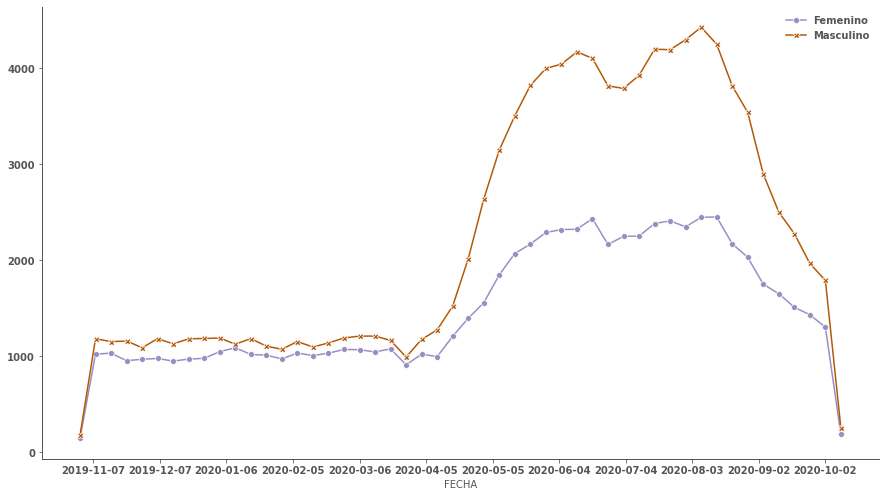

In [25]:
import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=30.0)

plt.figure(figsize=(15, 8))
flatui = ["#998ec3", "#b35806"]
femenino = weekly_sales[weekly_sales.columns[0]].values
#femenino
masculino = weekly_sales[weekly_sales.columns[2]].values
#masculino
#list_data
#y2

df = pd.DataFrame(np.c_[femenino, masculino], index= weekly_sales.index)
#df
ax = sns.lineplot(data=df, palette=flatui, markers=True, dashes=False)
ax.legend(['Femenino', 'Masculino'])
ax.xaxis.set_major_locator(loc)
grid = ax.get_figure()
#grid.savefig('tasageneros_yunguyo_semanas.png')